In [1]:
import warnings
import matplotlib
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
train_images=pd.read_csv('../Volcano_on_venus_dataset/Volcanoes_train/train_images.csv',header = None)
train_labels=pd.read_csv('../Volcano_on_venus_dataset/Volcanoes_train/train_labels.csv')
test_images=pd.read_csv('../Volcano_on_venus_dataset/Volcanoes_test/test_images.csv',header = None)
test_labels=pd.read_csv('../Volcano_on_venus_dataset/Volcanoes_test/test_labels.csv')
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(7000, 12100) (7000, 4)
(2734, 12100) (2734, 4)


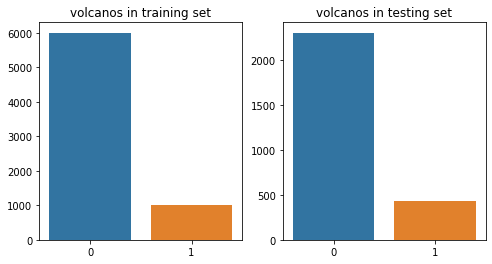

In [3]:
train_counts = train_labels['Volcano?'].value_counts()
test_counts = test_labels['Volcano?'].value_counts()

plt.figure(figsize = (8,4))
plt.subplot(121)
sns.barplot(train_counts.index, train_counts.values)
plt.title('volcanos in training set')
plt.subplot(122)
sns.barplot(test_counts.index, test_counts.values)
plt.title('volcanos in testing set')
plt.show()

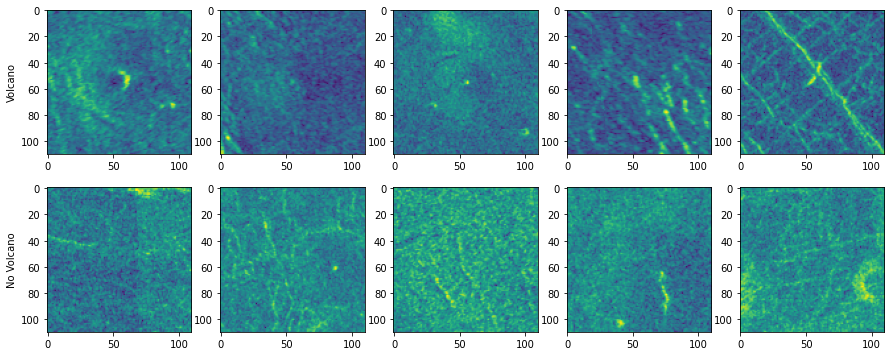

In [12]:
pos_samples = train_images[train_labels['Volcano?'] == 1].sample(5)
neg_samples = train_images[train_labels['Volcano?'] == 0].sample(5)
plt.subplots(figsize = (15,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(pos_samples.iloc[i,:].values.reshape((110, 110)))
    if i == 0: plt.ylabel('Volcano')
# plt.show()
for i in range(5):
    plt.subplot(2,5,i+6)
    if i == 0: plt.ylabel('No Volcano')
    plt.imshow(neg_samples.iloc[i,:].values.reshape((110,110)))
plt.show()

In [5]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)


        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)


In [6]:
###KNN algorithm for 2 class (volcao or no volcano)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class knn_algorithm:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        total_V=0;total_NV=0
        for i in range(len(k_neighbor_labels)):
            if k_neighbor_labels[i]==0:
                total_NV = total_NV + 1

            else:
                total_V = total_V + 1

        if total_V>total_NV:
            # print('prediction is Male')
            return 1
        else:
            # print('prediction is Women')
            return 0
        

In [7]:
    ####normalizing train and test data
    Xtrain_raw = train_images / 256
    ytrain_raw = train_labels['Volcano?']
    Xtest_raw = test_images / 256
    ytest_raw = test_labels['Volcano?']

    X = Xtrain_raw
    y = ytrain_raw
    print('y_label',y)
     
    # Project the training data onto the 35 primary principal components
    pca = PCA(35)
    pca.fit(X)
    X_projected1 = pca.transform(X)

y_label 0       1
1       0
2       0
3       0
4       0
       ..
6995    0
6996    0
6997    0
6998    0
6999    0
Name: Volcano?, Length: 7000, dtype: int64


In [8]:
    X = Xtest_raw
    y = ytest_raw
    print('y_label',y)

    # Project the test data onto the 35 primary principal components
    pca = PCA(35)
    pca.fit(X)
    X_projected2 = pca.transform(X)


y_label 0       0
1       0
2       1
3       0
4       1
       ..
2729    0
2730    0
2731    0
2732    0
2733    0
Name: Volcano?, Length: 2734, dtype: int64


In [9]:
    def accuracy1(y_true, y_pred):
        accu = 0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                accu += 1
        print(accu,len(y_pred))
        return accu / len(y_pred)
    k_val=[3,5,7,10,20,35,50]
    for i in k_val:
        kn = knn_algorithm(i)
        kn.fit(X_projected1,ytrain_raw)
        prediction1 = kn.predict(X_projected2)
        accu_test=accuracy1(ytest_raw,prediction1)
        print('accu of test',i,accu_test)

2230 2734
accu of test 3 0.8156547183613753
2261 2734
accu of test 5 0.8269934162399415
2276 2734
accu of test 7 0.8324798829553768
2290 2734
accu of test 10 0.8376005852231163
2296 2734
accu of test 20 0.8397951719092904
2297 2734
accu of test 35 0.8401609363569861
2296 2734
accu of test 50 0.8397951719092904


In [10]:
####KNN algorith for 4 classes(volacano definatly present,probably present,possibly present,only pit present)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class knn_algorithm_4_classes:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y1,y2):
        self.X_train = X
        self.y_train1 = y1
        self.y_train2 = y2
        

    def predict(self, X):
        y_pred1= [self.predicted(x) for x in X]
        return y_pred1

    def predicted(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        dist_list=[]
        k_idx = np.argsort(distances)[: self.k]
        for i in k_idx:
            dist_list.append(distances[i])
        k_neighbor_labels1 = [self.y_train1[i] for i in k_idx]
        k_neighbor_labels2 = [self.y_train2[i] for i in k_idx]
        
        total_0=0;total_12=0;total_13=0;total_14=0;total_11=0
        for i in range(len(k_neighbor_labels1)):
            if k_neighbor_labels1[i]==0 :
                if dist_list[i]==0:
                    total_0 =total_0+1
                else:   
                    total_0 = total_0 + np.divide(1,dist_list[i])
                
            elif k_neighbor_labels1[i]==1 and k_neighbor_labels2[i]==1:
                if dist_list[i]==0:
                    total_11 =total_11+1
                else:   
                    total_11=total_11 + np.divide(1,dist_list[i])
                
            elif k_neighbor_labels1[i]==1 and k_neighbor_labels2[i]==2:
                if dist_list[i]==0:
                    total_12 =total_12+1
                else:   
                    total_12=total_12 + np.divide(1,dist_list[i])
                
            elif k_neighbor_labels1[i]==1 and k_neighbor_labels2[i]==3:
                if dist_list[i]==0:
                    total_13 =total_13+1
                else: 
                    total_13=total_13 + np.divide(1,dist_list[i])
                
            elif k_neighbor_labels1[i]==1 and k_neighbor_labels2[i]==4:
                if dist_list[i]==0:
                    total_14 =total_14+1
                else: 
                    total_14=total_14 + np.divide(1,dist_list[i])
                
        
        if total_0>total_11 and total_0>total_12 and total_0>total_13 and total_0>total_14:
#           print('prediction is 0')
            return 0,'NaN'
        elif total_11>total_0 and total_11>total_12 and total_11>total_13 and total_11>total_14:
#             print('prediction is 11')
            return 1,1
        elif total_12>total_0 and total_12>total_11 and total_12>total_13 and total_12>total_14:
#             print('prediction is 12')
            return 1,2
        elif total_13>total_0 and total_13>total_12 and total_13>total_11 and total_13>total_14:
#             print('prediction is 13')
            return 1,3
        elif total_14>total_0 and total_14>total_12 and total_14>total_13 and total_14>total_11:
#             print('prediction is 14')
            return 1,4
        
       


In [11]:
###considering 2 columns from train label and test label
ytrain_raw_new1 =train_labels['Volcano?']
ytrain_raw_new2=train_labels['Type']

ytest_raw_new1 =test_labels['Volcano?']
ytest_raw_new2=test_labels['Type']

vol_train_count=np.sum(ytrain_raw_new1==1)
no_vol_train_count=np.sum(ytrain_raw_new1==0)

vol_test_count=np.sum(ytest_raw_new1==1)
no_vol_test_count=np.sum(ytest_raw_new1==0)

    
def accuracy(y_true1,y_true2, y_pred1):

    accu=0;accu_no_vol=0;accu_vol=0 
    for i in range(len(y_true1)):
        if y_true1[i] == y_pred1[i][0] and y_pred1[i][0] == 0:
            accu += 1
            accu_no_vol+=1
        elif y_true1[i] == y_pred1[i][0] and y_true2[i] == y_pred1[i][1]:
            accu += 1 
            accu_vol+=1

    accu= accu /len(y_pred1)
#     print(accu_vol,vol_test_count)
    accu_no_vol=accu_no_vol/no_vol_test_count
    accu_vol=accu_vol/vol_test_count      
    return accu_vol
    
k_val=[3,5,7,10]
for i in k_val:
    kn = knn_algorithm_4_classes(i)
    kn.fit(X_projected2,ytest_raw_new1,ytest_raw_new2)  
    prediction1 = kn.predict(X_projected2)
    accu_test=accuracy(ytest_raw_new1,ytest_raw_new2,prediction1)
    print('accu of test',i,accu_test)

accu of test 3 0.7304147465437788
accu of test 5 0.4032258064516129
accu of test 7 0.24423963133640553
accu of test 10 0.12903225806451613
